In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils import *

In [2]:
data = pd.read_csv('./data/MI_timesteps.txt',sep=' ', skiprows=range(1,1001))
data

,timeStep,areaDensityCounting-PID5,areaDensityCounting-PID6,areaDensityCounting-PID7,areaDensityCounting-PID8,areaDensityCounting-PID9,areaDensityCounting-PID10,areaDensityCounting-PID11,areaDensityCounting-PID12,areaDensityCounting-PID13
0,1001,0,2,97,7,0,0,5,1,43
1,1002,0,2,96,7,0,0,5,1,45
2,1003,0,2,95,6,0,0,5,0,46
3,1004,0,2,94,6,0,0,4,1,46
4,1005,0,2,92,6,0,0,5,0,46
...,...,...,...,...,...,...,...,...,...,...
13996,14997,0,10,95,4,0,0,2,1,39
13997,14998,0,10,94,3,0,0,3,1,39
13998,14999,0,10,93,3,0,1,2,1,40
13999,15000,0,10,93,3,0,1,3,1,41


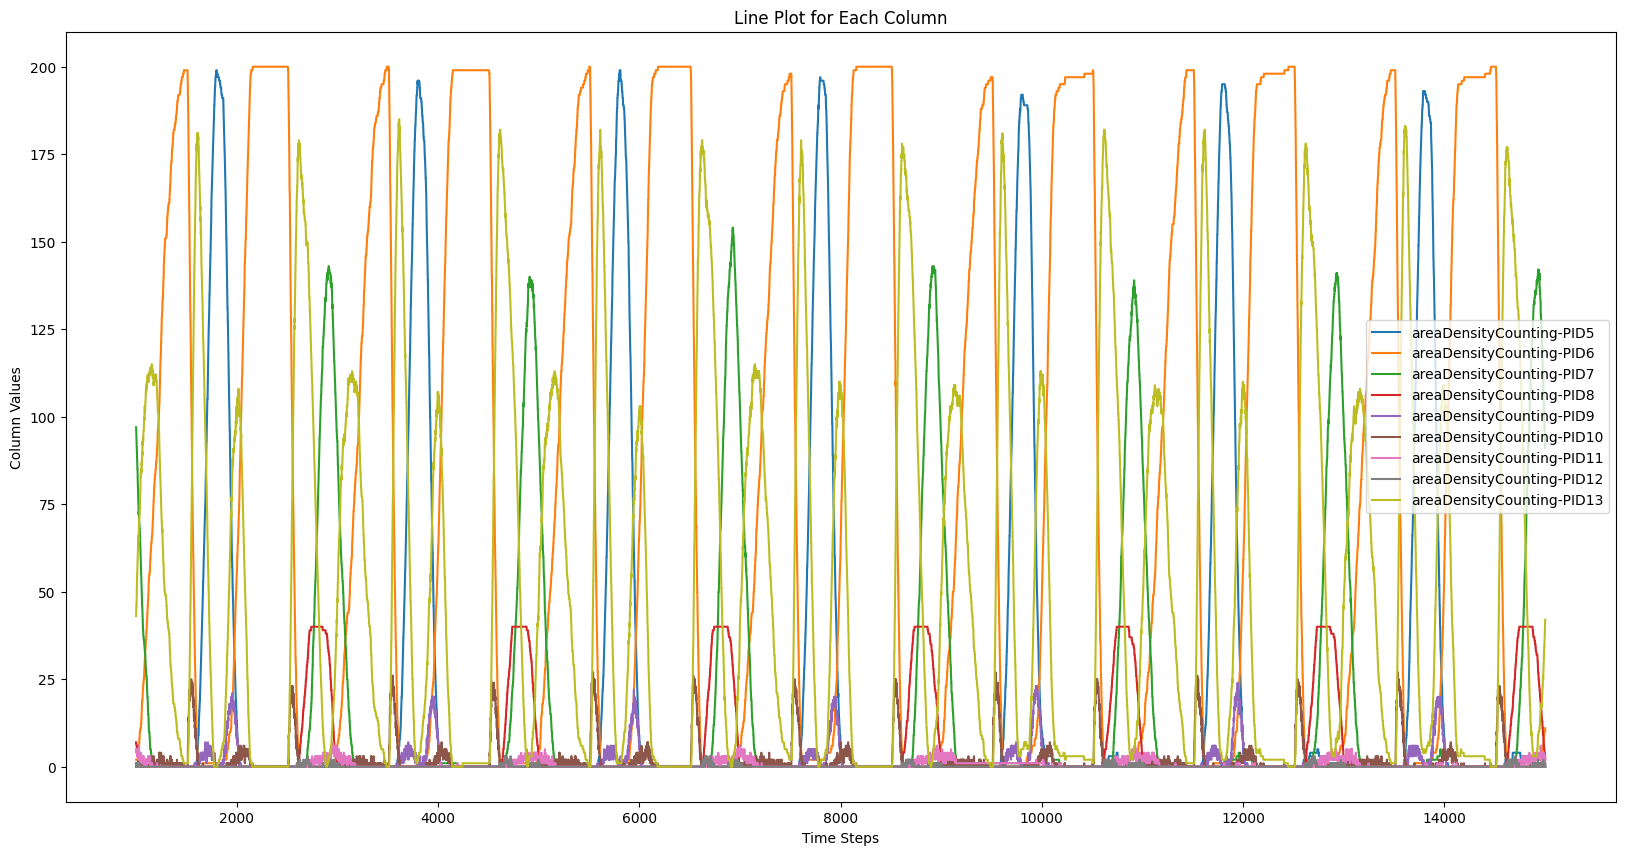

In [3]:
fig = plt.figure(figsize=(20,10))
for column in data.columns[1:]:
    plt.plot(data['timeStep'], data[column], label=column)

plt.xlabel('Time Steps')
plt.ylabel('Column Values')
plt.title('Line Plot for Each Column')
plt.legend()

In [4]:
def create_delay_embedding(data, delay):
    n_rows = len(data) - delay
    embedded_data = np.zeros((n_rows, (delay + 1)*3))

    for i in range(n_rows):
        embedded_data[i] = data.iloc[i:i + delay + 1,1:4].values.flatten()

    return embedded_data

Part 5.1

In [5]:
window_matrix = create_delay_embedding(data,351)
window_matrix.shape

(13650, 1056)

In [6]:
pca = PCA(n_components=3)  
pca_result = pca.fit_transform(window_matrix)
pca_result.shape

(13650, 3)

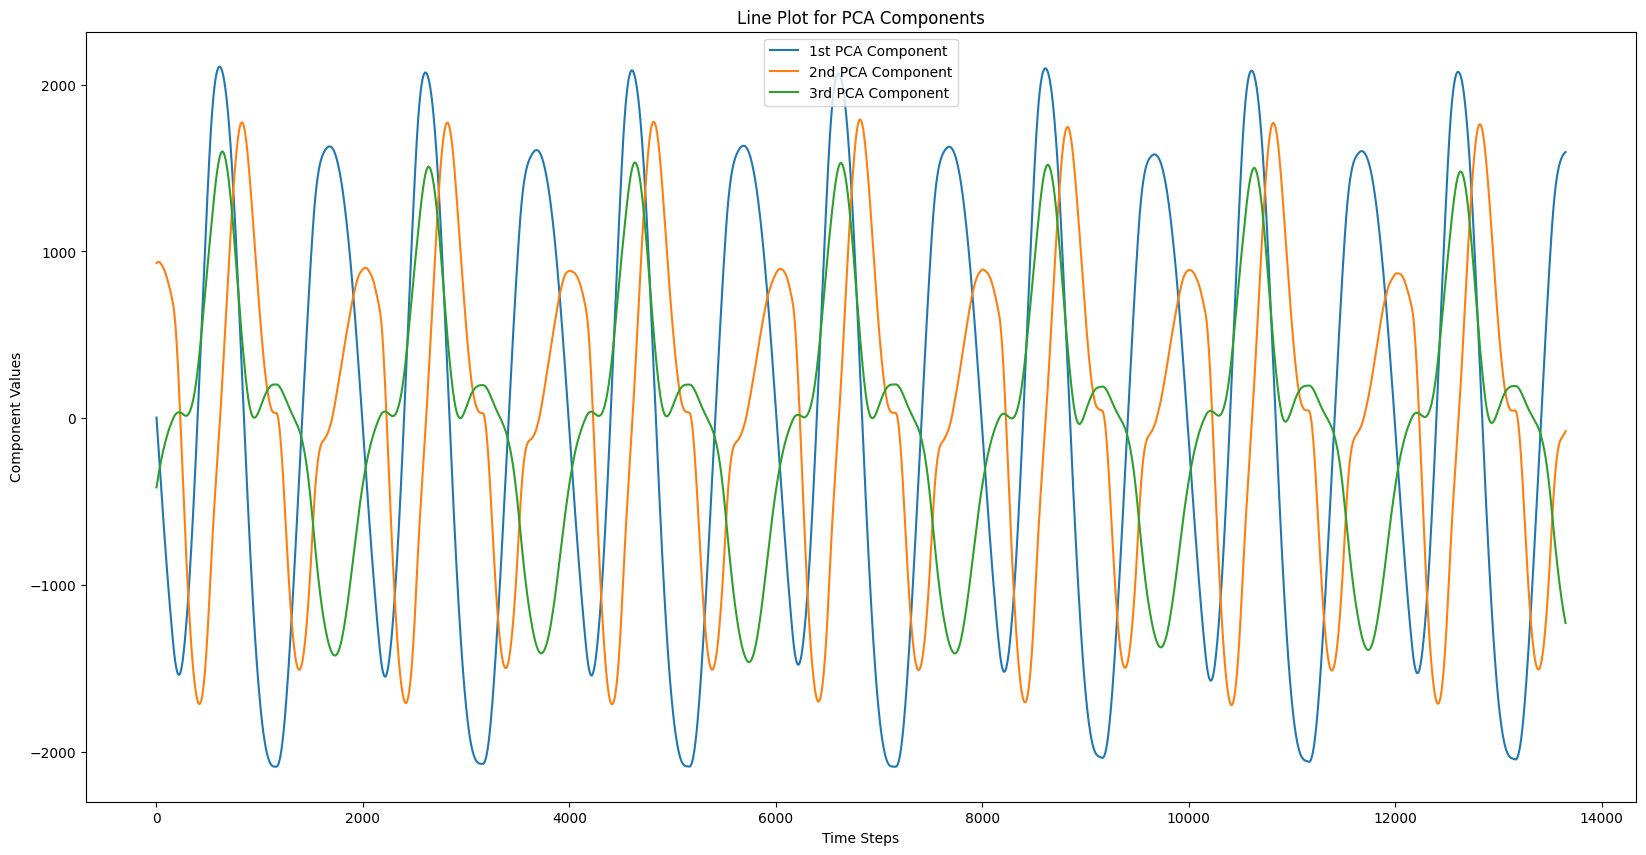

In [7]:
#prepare
x_original = window_matrix[:, :9]
X_pca = pca_result  

# 2D plot
plt.figure(figsize=(20, 10))
plt.plot(X_pca[:,0], label='1st PCA Component')
plt.plot(X_pca[:,1], label='2nd PCA Component')
plt.plot(X_pca[:,2], label='3rd PCA Component')
plt.xlabel('Time Steps')
plt.ylabel('Component Values')
plt.title('Line Plot for PCA Components')
plt.legend()
plt.show()

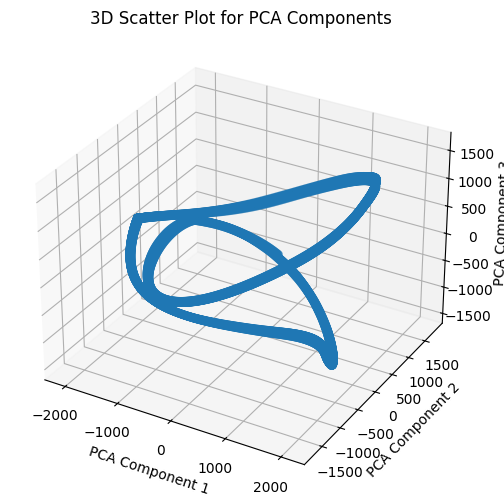

In [8]:
# 3D scatter plot for the first three PCA components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D Scatter Plot for PCA Components')
plt.show()


Part 5.2

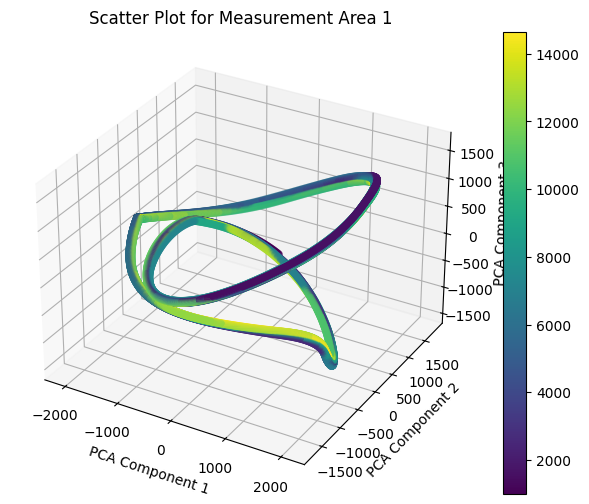

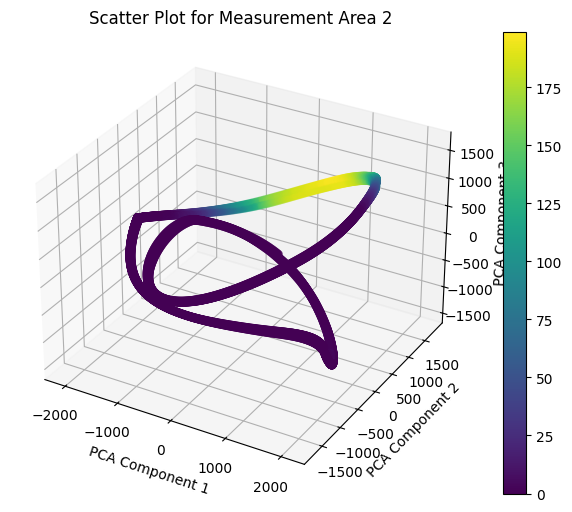

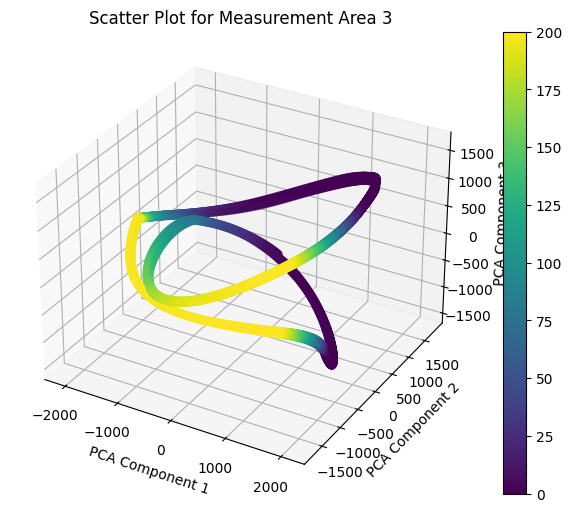

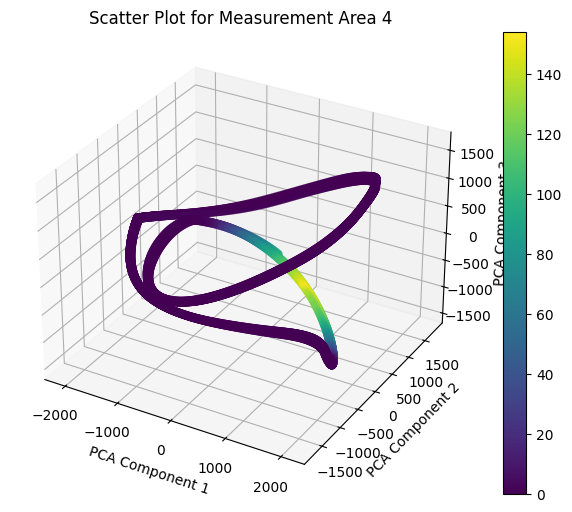

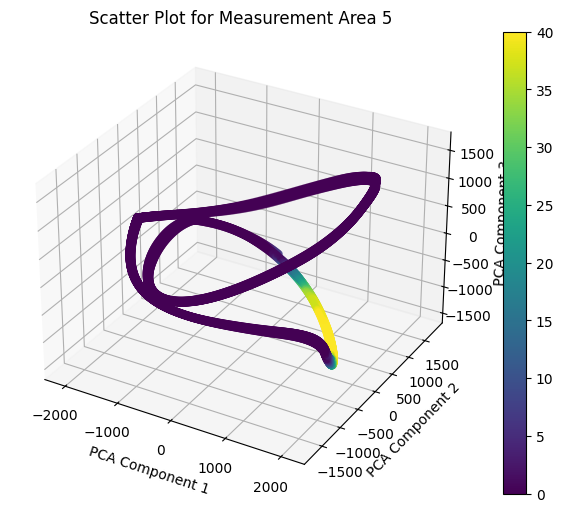

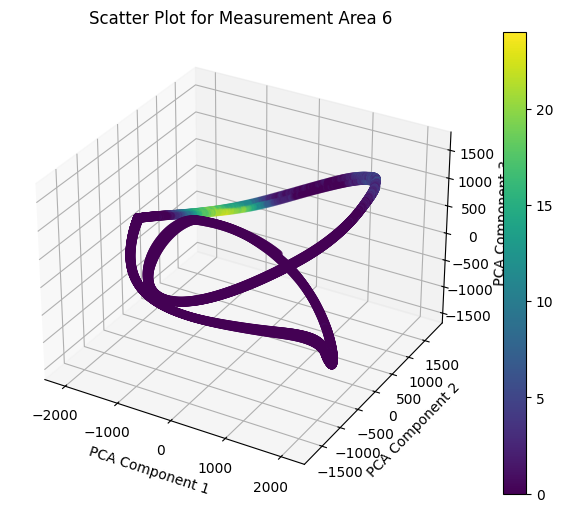

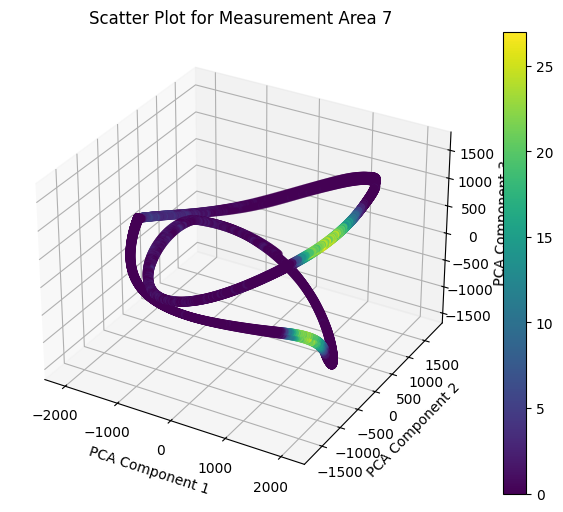

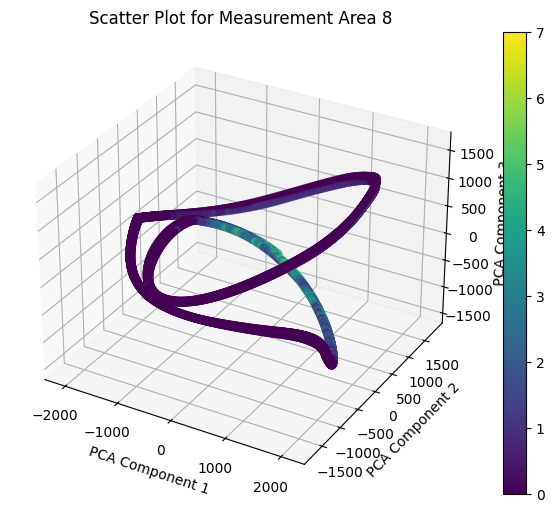

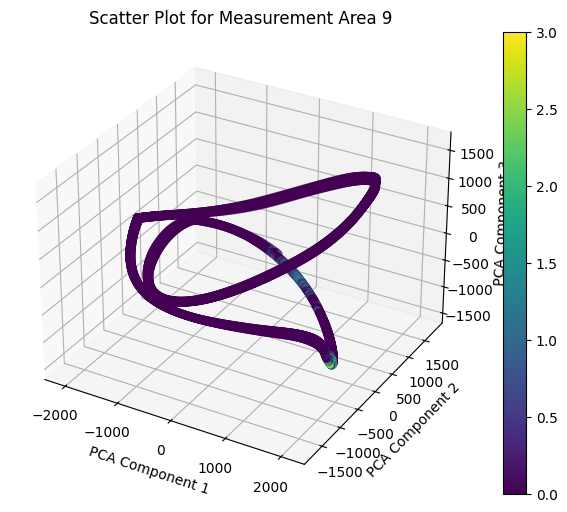

In [9]:
for i in range(9):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Adjust the scatter plot with three components (x, y, z)
    scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=data.iloc[:len(pca_result), i])
    
    plt.colorbar(scatter)
    ax.set_title(f'Scatter Plot for Measurement Area {i+1}')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    name=f'task5_2_{i+1}.png'
    plt.savefig(name)

    plt.show()

Part 5.3

In [10]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [16]:
from statsmodels.tsa.stattools import acf
import math 

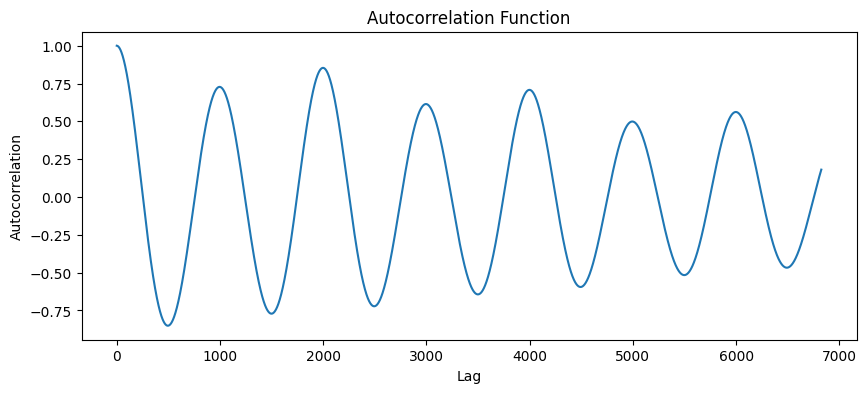

In [27]:
component = X_pca[:, 0]
autocorr = acf(component, fft=True, nlags=len(component)//2)

plt.figure(figsize=(10, 4))
plt.plot(autocorr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()


In [32]:
threshold_distance = 100.0
start_index = 100

# Create a generator expression to calculate distances and filter out artifacts
distances = ((i, np.linalg.norm(point - X_pca[start_index])) for i, point in enumerate(X_pca) if i > start_index)

try:
    lowest_dist_idx, lowest_dist = min(distances, key=lambda x: x[1])
except ValueError:
    lowest_dist_idx, lowest_dist = -1, np.inf


In [33]:
#calculate arclength, speed 
arclens = []  
speeds = []  
cum_arclen = 0  # variable to accumulate arclen value (is zeroed out at every period)
for i in range(X_pca.shape[0] -1):
    if i != 0 and i % lowest_dist_idx == 0:  # zero out if period end is met
        cum_arclen = 0
    dt = i % lowest_dist_idx + 1
    cum_arclen += np.linalg.norm(X_pca[i+1]-X_pca[i])  # get current arclen by L2-norm
    arclens.append(cum_arclen)  
    speeds.append(cum_arclen / dt)

# Normalize the arclength for visualization
normalized_arclength = np.array(arclens) / max(arclens) * 2 * np.pi

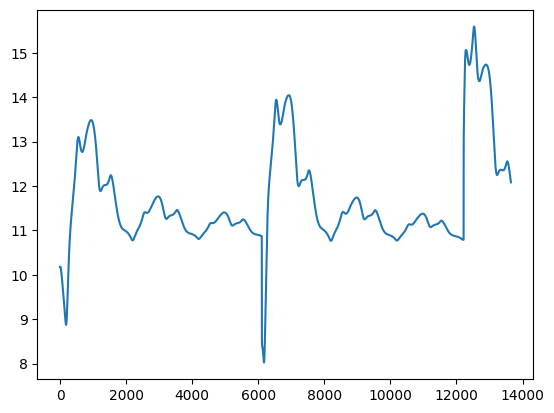

In [34]:
plt.plot(speeds)

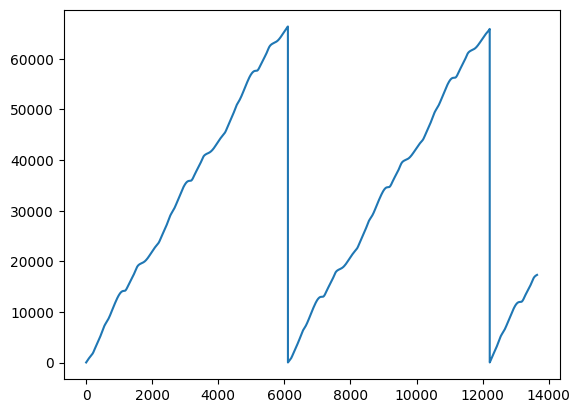

In [35]:
plt.plot(arclens)

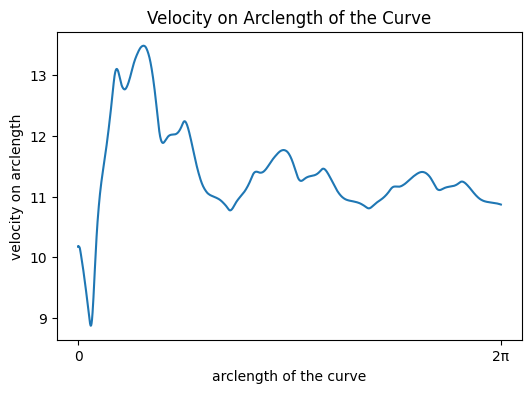

In [37]:
# Plot the new vector field
plt.figure(figsize=(6, 4))
period_speeds = speeds[:lowest_dist_idx]
period_speeds_x = [i * 2 * math.pi / len(period_speeds) for i in range(len(period_speeds))]  # to plot only '0' and '2pi'
plt.plot(period_speeds_x, period_speeds)
plt.xlabel('arclength of the curve')
plt.ylabel('velocity on arclength')
plt.title('Velocity on Arclength of the Curve')
plt.xticks([0, 6.28], ['0', '2π'], rotation='horizontal')
plt.show()

Part 5.4

Learn the dynamics on the periodic curve you embedded in the principal components.
Predict the utilization of the MI building for the next 14 days
which should look like one of the graphs in figure 3, just about twice as long.

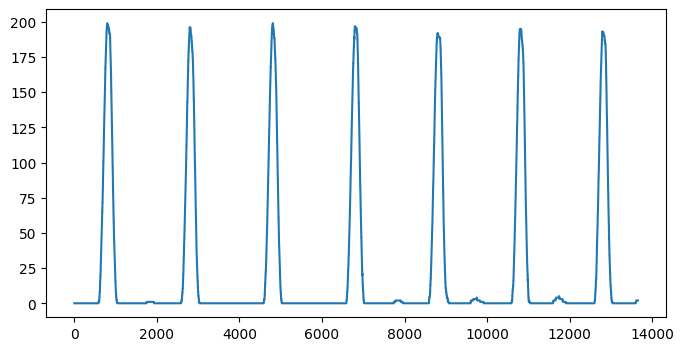

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(x_original[:,0])

In [ ]:
#make the final data for 14days 
''''fig = plt.figure(figsize=(20,10))
for column in data.columns[1:]:
    plt.plot(data['timeStep'], data[column], label=column)

plt.xlabel('Time Steps')
plt.ylabel('Column Values')
plt.title('Line Plot for Each Column')
plt.legend()'''

"'fig = plt.figure(figsize=(20,10))\nfor column in data.columns[1:]:\n    plt.plot(data['timeStep'], data[column], label=column)\n\nplt.xlabel('Time Steps')\nplt.ylabel('Column Values')\nplt.title('Line Plot for Each Column')\nplt.legend()"